In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pathlib import Path
import tkinter
from tkinter.filedialog import asksaveasfile, askopenfilenames
import re
import ntpath
import os.path
from matplotlib import colors
import time
import json
from GPyTool_functions import *

In [15]:
N = 400 #trajectory length
alpha_1 = 0.45 #alpha trajectory 1
alpha_2 = 0.65 #alpha trajectory 2
alpha_back = 1.3 #alpha substrate motion
D_1 = 1 #diffusion coefficient trajectory 1
D_2 = 1 #diffusion coefficient trajectory 2
D_back = 1 #diffusion coefficient substrate motion

Generate two 2D trajectories with common substrate motion.

In [16]:
traj_back = generate_2Dtraj(N,D_back,alpha_back)
traj_1 = generate_2Dtraj(N,D_1,alpha_1)
traj_2 = generate_2Dtraj(N,D_2,alpha_2);

Or two 3D trajectories with common substrate motion

In [7]:
traj_back = generate_3Dtraj(N,D_back,alpha_back)
traj_1 = generate_3Dtraj(N,D_1,alpha_1)
traj_2 = generate_3Dtraj(N,D_2,alpha_2);

Run GPyTool on these two couple trajectories.

In [17]:
[res, traj_back_exp] = get_D_alpha_couple(traj_1+traj_back,traj_2+traj_back)
print('alpha_1 = '+str(res.x[1]))
print('D_1 = '+str(res.x[0]))
print('alpha_2 = '+str(res.x[3]))
print('D_2 = '+str(res.x[2]))
print('alpha_3 = '+str(res.x[5]))
print('D_3 = '+str(res.x[4]))

alpha_1 = 0.5038289765421249
D_1 = 0.8824797723674196
alpha_2 = 0.5405194549487762
D_2 = 0.9472280575744072
alpha_3 = 1.3898563711163088
D_3 = 1.0887025904264123


Plot the GP estimate of the substrate motion and compare to the ground truth.

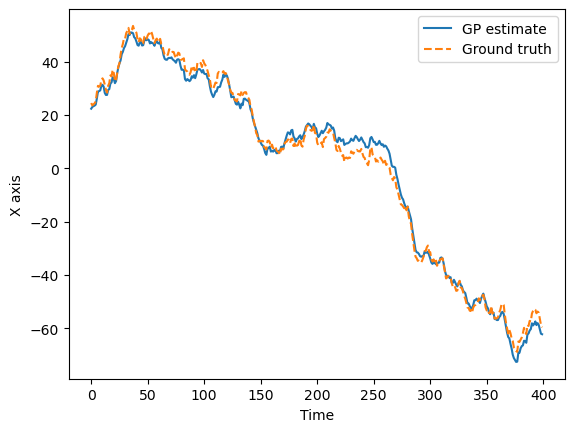

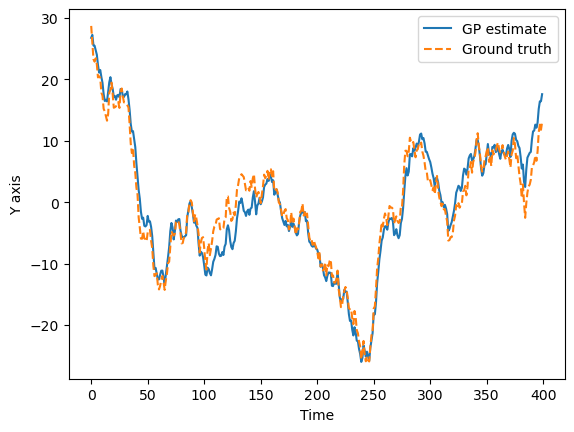

In [14]:
y_label = ['X axis', 'Y axis', 'Z axis']
for i in range(traj_back_exp.shape[1]):
    plt.figure();plt.plot(traj_back_exp[:,i],label=('GP estimate'));plt.plot(traj_back[:,i]-np.mean(traj_back-traj_back_exp,axis = 0)[i],'--',label=('Ground truth'));
    plt.xlabel('Time');plt.ylabel(y_label[i]);plt.legend()